In [1]:
import numpy as np 
import os
import cv2
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
from keras.models import load_model, Model

2023-11-14 22:49:24.817684: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-14 22:49:24.919429: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 22:49:24.919477: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 22:49:24.919509: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 22:49:24.957694: I tensorflow/core/platform/cpu_feature_g

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to allocate only a fraction of GPU memory
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=7600)]  # Adjust the memory limit as needed
            )
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


2023-11-14 22:49:26.904333: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-14 22:49:26.926376: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-14 22:49:26.926636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
X_train = []
y_train = []
X_test = []
y_test = []

In [4]:
labels = ['normal', 'PNEUMONIA']
directory_path = 'train/pneumonia'
train_pneumonia = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]
for name in train_pneumonia:
  y_train.append(1)
  img = cv2.imread(name)
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = cv2.resize(img,(256,256)) 

  X_train.append(img)

In [5]:
test_p_path = 'test/pneumonia'
test_pneumonia = [os.path.join(test_p_path, file) for file in os.listdir(test_p_path) if os.path.isfile(os.path.join(test_p_path, file))]

for name in test_pneumonia:
  y_test.append(1)
  img = cv2.imread(name)
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = cv2.resize(img,(256,256)) 

  X_test.append(img)

In [6]:
labels = ['normal', 'PNEUMONIA']
train_n_path = 'train/normal'
train_normal = [os.path.join(train_n_path, file) for file in os.listdir(train_n_path) if os.path.isfile(os.path.join(train_n_path, file))]

for name in train_normal:
  y_train.append(0)
  img = cv2.imread(name)
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = cv2.resize(img,(256,256)) 

  X_train.append(img)
print(len(X_train))

5216


In [7]:
labels = ['normal', 'PNEUMONIA']
test_n_path = 'test/normal'
test_normal =  [os.path.join(test_n_path, file) for file in os.listdir(test_n_path) if os.path.isfile(os.path.join(test_n_path, file))]

for name in test_normal:
  y_test.append(0)
  img = cv2.imread(name)
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = cv2.resize(img,(256,256)) 
  
  X_test.append(img)
print(len(X_test))

624


In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1,1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5216, 256, 256, 3)
(5216, 1)
(624, 256, 256, 3)
(624, 1)


In [9]:
X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(4694, 256, 256, 3)
(4694, 1)
(522, 256, 256, 3)
(522, 1)
(624, 256, 256, 3)
(624, 1)


In [10]:
model = Sequential()

model.add(Conv2D(64,3,activation='relu', input_shape=(256, 256,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())



model.add(Conv2D(64,3,activation='relu', padding='same'))
model.add(Conv2D(64,3,activation='relu', padding='same'))
model.add(Conv2D(64,3,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,3,activation='relu', padding='same'))
model.add(Conv2D(128,3,activation='relu', padding='same'))
model.add(Conv2D(128,3,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256,3,activation='relu', padding='same'))
model.add(Conv2D(256,3,activation='relu', padding='same'))
model.add(Conv2D(256,3,activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())          
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [11]:
optimizer1 = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer1,loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=50,epochs=15,validation_data=(X_val,y_val))

Epoch 1/15


2023-11-14 22:51:03.571085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-14 22:51:03.800343: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:231] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-11-14 22:51:03.800374: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:234] Used ptxas at ptxas
2023-11-14 22:51:03.800695: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:322] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-11-14 22:51:04.337521: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.48GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory

 1/94 [..............................] - ETA: 13:02 - loss: 0.6170 - accuracy: 0.7600

2023-11-14 22:51:09.919706: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.86GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


93/94 [============================>.] - ETA: 0s - loss: 0.1668 - accuracy: 0.9327

2023-11-14 22:51:28.283449: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-14 22:51:28.283477: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-14 22:51:30.820979: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.96GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


94/94 [==============================] - 32s 252ms/step - loss: 0.1660 - accuracy: 0.9329 - val_loss: 1.2679 - val_accuracy: 0.7261
Epoch 2/15
94/94 [==============================] - 19s 202ms/step - loss: 0.0587 - accuracy: 0.9785 - val_loss: 2.0306 - val_accuracy: 0.7261
Epoch 3/15
94/94 [==============================] - 19s 202ms/step - loss: 0.0494 - accuracy: 0.9827 - val_loss: 1.4601 - val_accuracy: 0.7261
Epoch 4/15
94/94 [==============================] - 19s 202ms/step - loss: 0.0344 - accuracy: 0.9885 - val_loss: 0.0690 - val_accuracy: 0.9789
Epoch 5/15
94/94 [==============================] - 19s 202ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0568 - val_accuracy: 0.9828
Epoch 6/15
94/94 [==============================] - 19s 202ms/step - loss: 0.0142 - accuracy: 0.9947 - val_loss: 0.0822 - val_accuracy: 0.9789
Epoch 7/15
94/94 [==============================] - 19s 202ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0987 - val_accuracy: 0.9789
Epoch 8/15

In [12]:
model.save('cnn_pneumonia.h5')
main_model = load_model('cnn_pneumonia.h5')

/home/thenoobmirchi/PycharmProjects/pythonProject1/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 204ms/step


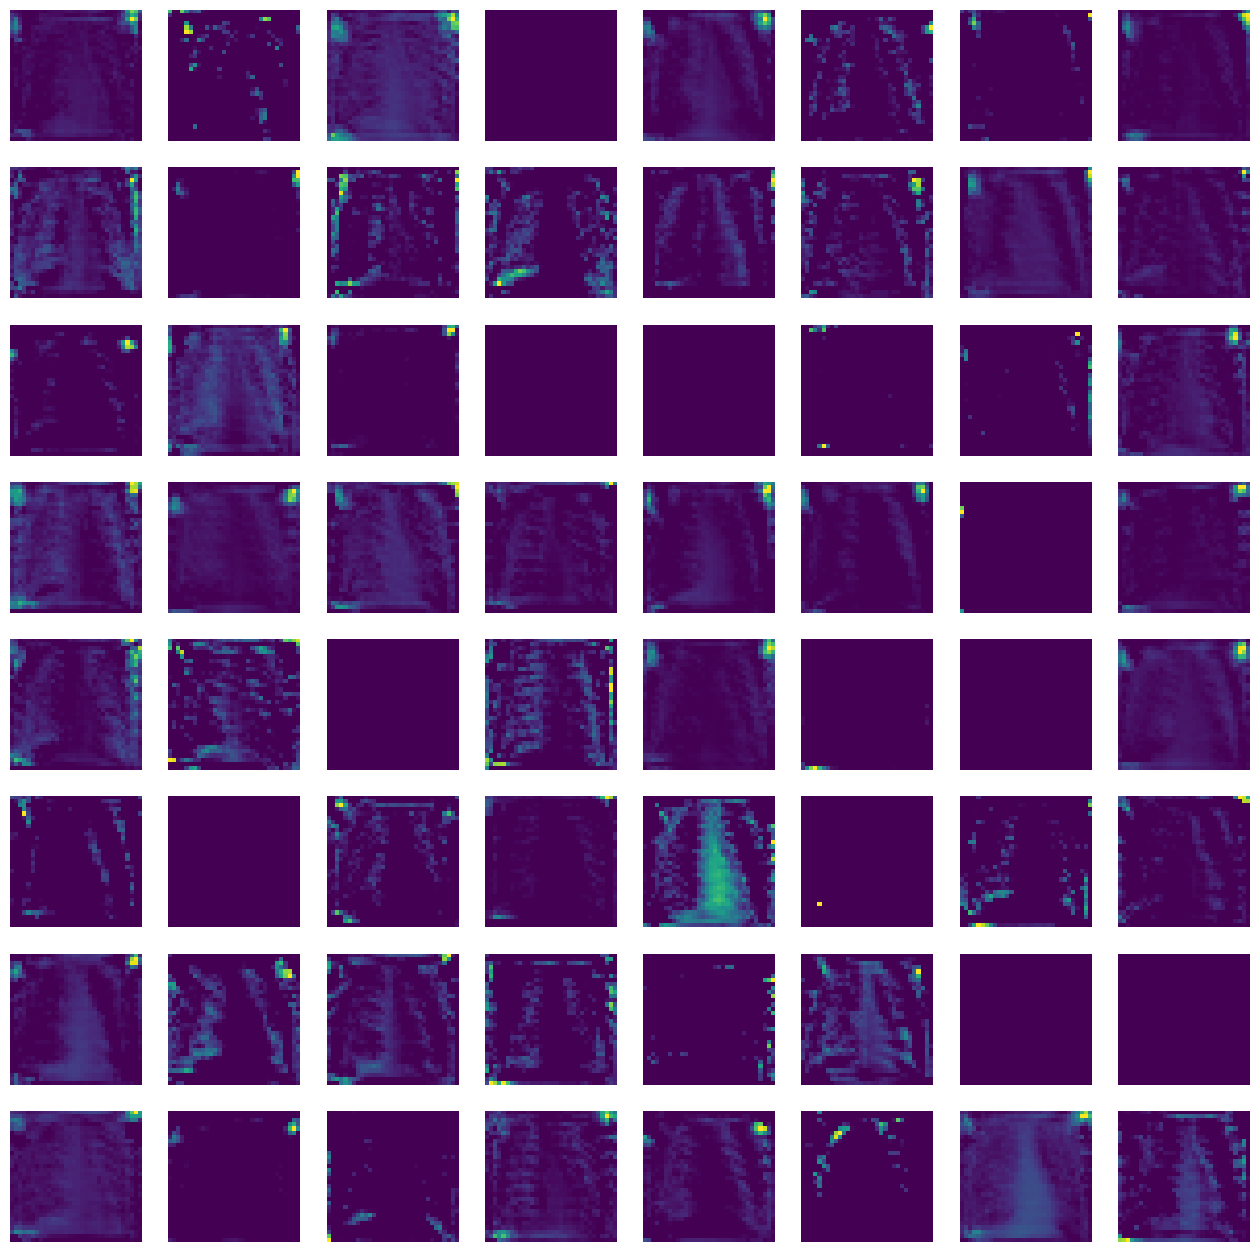

In [14]:
# Extract feature maps from the last convolutional layer found by the model.summary() function

layer_name = 'conv2d_9' 
feature_extractor_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)


sample_image = X_test[235]  
sample_image = np.expand_dims(sample_image, axis=0)
activations = feature_extractor_model.predict(sample_image)


num_filters = 64


plt.figure(figsize=(16, 16))
for i in range(num_filters):
    plt.subplot(num_filters // 8, 8, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis') 
    plt.axis('off')

plt.show()

In [15]:
y_hat = main_model.predict(X_test)
def predict(y_hat):
    y_hat[y_hat >= 0.5] =1
    y_hat[y_hat<0.5] =0
    return y_hat
y_pred = predict(y_hat)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
result= []
real_result = []
for i in y_pred:
    if i==0:
        result.append('Normal')
    if i==1:
        result.append('Pneumonia')
for i in y_pred:
    if i==0:
        real_result.append('Normal')
    if i==1:
        real_result.append('Pneumonia')

20/20 [==============================] - 2s 56ms/step
0.842948717948718


In [16]:
labels = ['Normal', 'Pneumonia']
report = classification_report(y_test, y_pred, target_names=labels)
print(report)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

      Normal       0.95      0.62      0.75       234
   Pneumonia       0.81      0.98      0.89       390

    accuracy                           0.84       624
   macro avg       0.88      0.80      0.82       624
weighted avg       0.86      0.84      0.83       624

Accuracy: 0.842948717948718


[[144  90]
 [  8 382]]


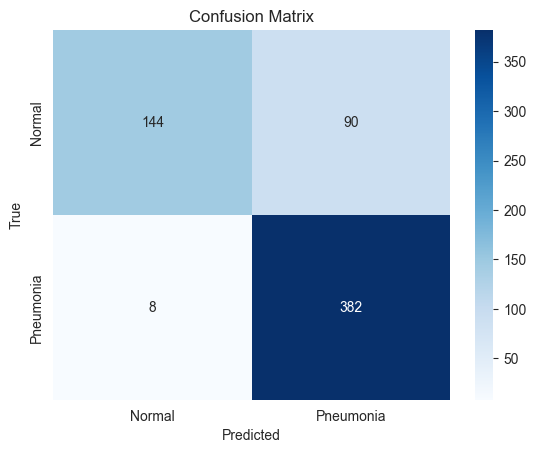

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

tick_labels = ['Normal', 'Pneumonia']
plt.xticks(np.arange(len(tick_labels)) + 0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels)) + 0.5, tick_labels)

plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix')
plt.show()

In [18]:
import GPUtil

def check_gpu_info():
    # Get the list of available GPUs
    gpus = GPUtil.getGPUs()

    if not gpus:
        print("No GPU devices found.")
        return

    # Print information for each GPU
    for i, gpu in enumerate(gpus):
        print(f"GPU {i + 1}:")
        print(f"  Name: {gpu.name}")
        print(f"  Memory Free: {gpu.memoryFree} MB")
        print(f"  Memory Used: {gpu.memoryUsed} MB")
        print(f"  Memory Total: {gpu.memoryTotal} MB")
        print(f"  GPU Load: {gpu.load * 100}%")
        print()




    # Print the total number of GPUs
    print(f"Total Number of GPUs: {len(gpus)}")

if __name__ == "__main__":
    check_gpu_info()


GPU 1:
  Name: NVIDIA GeForce RTX 4070 Laptop GPU
  Memory Free: 169.0 MB
  Memory Used: 7770.0 MB
  Memory Total: 8188.0 MB
  GPU Load: 0.0%

Total Number of GPUs: 1
